# Actividad: Análisis exploratorio con técnicas de agrupamiento


Links del Colab: https://colab.research.google.com/drive/1R3Er-mSuHdAurw9B--pi9RDczNQG_jbs?usp=sharing

In [231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import calinski_harabasz_score

In [232]:
data0 = pd.read_csv("/content/drive/MyDrive/7mo Semestre/Colab Notebooks/DataSources/Country-data.csv")
data0

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [233]:
data = data0.drop('country', axis = 1)

## 1. Aplica k-medias sobre el conjunto de datos para generar un agrupamiento para los países de la base de datos. Utiliza al menos dos métodos para estimar el número óptimo de grupos.

Número Óptimo de clusters (Elbow method y Davies-Bouldin index)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

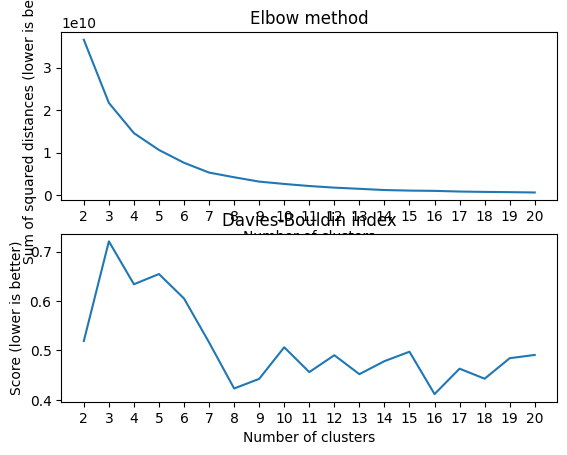

In [234]:
# Optimal number of clusters
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    kmeans = KMeans(n_clusters=k).fit(data)

    # Evaluate sum of squared distances
    sum_of_squared_distances.append(kmeans.inertia_)

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(data, kmeans.labels_))

fig, (axs1, axs2) = plt.subplots(2)

axs1.plot(ks, sum_of_squared_distances)
axs1.set_xlabel('Number of clusters')
axs1.set_ylabel('Sum of squared distances (lower is better)')
axs1.set_title('Elbow method')
axs1.set_xticks(ks)

axs2.plot(ks, dbscore)
axs2.set_xlabel('Number of clusters')
axs2.set_ylabel('Score (lower is better)')
axs2.set_title('Davies-Bouldin index')
axs2.set_xticks(ks)

plt.show()

Si observamos detenidamente, notaremos que ambas metricas nos indican que el numero más óptimo de clusters es entre 7 y 8 clusters. Así que esa utilizaremos 8 clusters:

In [235]:
kmeans = KMeans(n_clusters=8).fit(data)
clustering_labels = kmeans.labels_
centers = kmeans.cluster_centers_

print('Labels: ', clustering_labels)
print('Centers: ', centers)

Labels:  [1 1 2 1 2 2 1 0 0 2 5 5 1 2 2 0 1 1 1 1 1 2 2 4 2 1 1 1 1 0 1 1 1 2 1 2 1
 1 1 2 1 2 5 5 0 2 1 1 1 5 1 2 1 0 0 2 1 1 0 1 5 2 1 1 1 1 1 2 0 1 1 2 2 0
 5 0 1 0 1 2 1 1 4 1 1 2 2 1 1 5 2 3 2 1 1 2 2 1 5 1 2 1 1 1 2 1 1 1 1 1 0
 5 1 1 7 5 1 2 1 1 1 2 5 6 2 2 1 1 5 1 2 2 1 4 5 5 1 2 5 5 1 2 1 2 0 7 1 1
 2 1 1 1 1 2 1 1 1 4 0 0 2 1 1 2 1 1 1]
Centers:  [[4.29375000e+00 4.31437500e+01 1.07662500e+01 4.01312500e+01
  4.11250000e+04 1.09125000e+00 8.08062500e+01 1.79625000e+00
  4.61125000e+04]
 [6.30642857e+01 3.10392738e+01 6.14821429e+00 4.59448321e+01
  4.32670238e+03 9.84197619e+00 6.49273810e+01 3.89309524e+00
  1.94778571e+03]
 [1.77357143e+01 4.38476190e+01 6.69952381e+00 4.52071429e+01
  1.61576190e+04 7.26590476e+00 7.33880952e+01 2.06785714e+00
  8.94761905e+03]
 [2.80000000e+00 1.75000000e+02 7.77000000e+00 1.42000000e+02
  9.17000000e+04 3.62000000e+00 8.13000000e+01 1.63000000e+00
  1.05000000e+05]
 [8.17500000e+00 1.02950000e+02 3.27250000e+00 7.40000000e+01
  7.1375000

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [236]:
labels = pd.DataFrame(clustering_labels)
data_km = pd.concat([data0, labels], axis = 1)
data_km

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,1
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,2
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,2
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,1
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,2
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [237]:
for j in range(8):
  print('\nCluster: ', j, '\nPaises:')
  for i in range(len(data_km)):
    if data_km.iloc[i][0] == j:
      print('\t', data_km.iloc[i]['country'])


Cluster:  0 
Paises:
	 Australia
	 Austria
	 Belgium
	 Canada
	 Denmark
	 Finland
	 France
	 Germany
	 Iceland
	 Ireland
	 Italy
	 Japan
	 Netherlands
	 Sweden
	 United Kingdom
	 United States

Cluster:  1 
Paises:
	 Afghanistan
	 Albania
	 Angola
	 Armenia
	 Bangladesh
	 Belize
	 Benin
	 Bhutan
	 Bolivia
	 Bosnia and Herzegovina
	 Burkina Faso
	 Burundi
	 Cambodia
	 Cameroon
	 Cape Verde
	 Central African Republic
	 Chad
	 China
	 Comoros
	 Congo, Dem. Rep.
	 Congo, Rep.
	 Cote d'Ivoire
	 Ecuador
	 Egypt
	 El Salvador
	 Eritrea
	 Fiji
	 Gambia
	 Georgia
	 Ghana
	 Guatemala
	 Guinea
	 Guinea-Bissau
	 Guyana
	 Haiti
	 India
	 Indonesia
	 Jamaica
	 Jordan
	 Kenya
	 Kiribati
	 Kyrgyz Republic
	 Lao
	 Lesotho
	 Liberia
	 Madagascar
	 Malawi
	 Mali
	 Mauritania
	 Micronesia, Fed. Sts.
	 Moldova
	 Mongolia
	 Morocco
	 Mozambique
	 Myanmar
	 Namibia
	 Nepal
	 Niger
	 Nigeria
	 Pakistan
	 Paraguay
	 Peru
	 Philippines
	 Rwanda
	 Samoa
	 Senegal
	 Sierra Leone
	 Solomon Islands
	 Sri Lanka
	 S

## 2. Repita lo anterior, pero con otro método de agrupamiento que elijas.

Utilizaremos Spectral Clustering (Silhouette score y Davies-Bouldin index):



/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ma

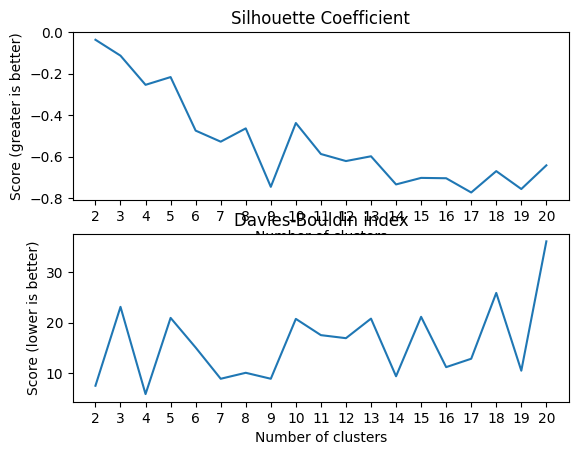

In [238]:
sum_of_squared_distances = []
sscore = []
chscore = []
dbscore = []

ks = np.arange(2, 21)
for k in ks:
    # Find clustering model
    spectral = SpectralClustering(n_clusters=k).fit(data)

    # Evaluate Silhouette score
    sscore.append(silhouette_score(data, spectral.labels_))

    # Evaluate Davies-Bouldin index
    dbscore.append(davies_bouldin_score(data, spectral.labels_))

fig, (axs1, axs2) = plt.subplots(2)

axs1.plot(ks, sscore)
axs1.set_xlabel('Number of clusters')
axs1.set_ylabel('Score (greater is better)')
axs1.set_title('Silhouette Coefficient')
axs1.set_xticks(ks)

axs2.plot(ks, dbscore)
axs2.set_xlabel('Number of clusters')
axs2.set_ylabel('Score (lower is better)')
axs2.set_title('Davies-Bouldin index')
axs2.set_xticks(ks)

plt.show()

Nuestras dos metricas esta vez estan en cierto desacuerdo. Silhouette indica que lo mejor es 2 o 4; y Davies-Bouldin indica que lo mejor es 6 o 9. En mi opinion, no hay mucho cambio entre el 6 y el 9 de Davies-Boudin, así que eligiré 6 clusters por ser la menor cantidad y estar muy cerca del promedio de los mejores valores de cada métrica.

In [239]:
spectral = SpectralClustering(n_clusters=6).fit(data)
clustering_labels = spectral.labels_
print('Labels: ', clustering_labels)

Labels:  [0 0 5 5 0 0 0 0 3 2 4 0 5 0 0 1 4 5 2 0 5 0 2 5 2 0 5 5 5 0 0 0 0 5 0 5 0
 2 5 4 2 0 0 4 0 3 0 0 4 5 0 0 3 0 5 0 4 5 5 0 0 0 0 0 4 2 5 5 0 5 0 2 0 5
 5 5 0 0 0 5 5 5 2 0 0 0 0 2 3 0 5 5 0 5 0 0 2 0 0 0 0 3 3 0 0 2 3 5 1 2 5
 0 1 0 0 5 5 5 0 0 3 0 2 3 5 5 0 0 0 0 2 0 3 5 5 1 0 0 0 5 0 5 5 0 0 5 0 0
 0 0 0 5 3 0 0 5 3 0 0 0 5 0 5 0 1 0 0]


/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [240]:
labels = pd.DataFrame(clustering_labels)
data_spec = pd.concat([data0, labels], axis = 1)
data_spec

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,0
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,5
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,5
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,5
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,1
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,0


In [241]:
for j in range(6):
  print('\nCluster: ', j, '\nPaises:')
  for i in range(len(data_spec)):
    if data_spec.iloc[i][0] == j:
      print('\t', data_spec.iloc[i]['country'])


Cluster:  0 
Paises:
	 Afghanistan
	 Albania
	 Antigua and Barbuda
	 Argentina
	 Armenia
	 Australia
	 Bahrain
	 Barbados
	 Belarus
	 Bolivia
	 Botswana
	 Burkina Faso
	 Canada
	 Cape Verde
	 Central African Republic
	 Chad
	 China
	 Comoros
	 Croatia
	 Cyprus
	 Denmark
	 Ecuador
	 Egypt
	 Eritrea
	 Estonia
	 Finland
	 Gabon
	 Ghana
	 Greece
	 Grenada
	 Guatemala
	 Guinea
	 Iceland
	 Indonesia
	 Iraq
	 Jamaica
	 Japan
	 Jordan
	 Kyrgyz Republic
	 Lao
	 Latvia
	 Lebanon
	 Libya
	 Macedonia, FYR
	 Malawi
	 Malaysia
	 Mali
	 Malta
	 Mauritania
	 Mauritius
	 Mongolia
	 Montenegro
	 New Zealand
	 Nigeria
	 Norway
	 Paraguay
	 Peru
	 Poland
	 Rwanda
	 Samoa
	 Saudi Arabia
	 Senegal
	 Seychelles
	 Solomon Islands
	 South Africa
	 South Korea
	 Sri Lanka
	 Suriname
	 Sweden
	 Tajikistan
	 Tanzania
	 Thailand
	 Timor-Leste
	 Togo
	 Turkey
	 Turkmenistan
	 United Arab Emirates
	 United Kingdom
	 United States
	 Uzbekistan
	 Venezuela
	 Yemen
	 Zambia

Cluster:  1 
Paises:
	 Belgium
	 Namibia
	 

## 3. Investiga qué librerías hay en Python para la implementación de mapas autoorganizados, y selecciona alguna para el agrupamiento de los datos de este ejercicio.

In [242]:
pip install -U som-learn

In [243]:
from somlearn import SOM

In [244]:
som = SOM(n_columns=2, n_rows=2, random_state=1)
labels = som.fit_predict(data)
print(labels)

[1 0 0 1 0 0 0 2 2 0 2 2 0 0 0 2 0 1 0 0 0 3 0 2 0 1 1 3 1 2 0 1 1 0 0 0 1
 1 1 0 1 0 2 2 2 0 0 0 0 1 1 2 0 2 2 1 1 0 2 1 2 0 3 1 1 3 1 2 2 0 0 0 3 2
 2 2 0 2 3 0 1 3 2 3 1 0 0 1 1 0 0 2 0 1 1 0 0 1 2 1 0 3 0 0 0 0 1 0 3 0 2
 2 1 1 2 0 1 0 0 0 0 0 2 2 0 0 1 3 0 1 0 0 1 2 2 2 3 3 2 2 0 0 1 0 2 2 3 1
 0 1 1 3 0 0 0 1 0 2 2 2 0 0 3 0 0 1 1]


In [245]:
labels = pd.DataFrame(labels)
data_som = pd.concat([data0, labels], axis = 1)
data_som

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,0
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553,1
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090,0
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460,0
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530,1
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200,0
...,...,...,...,...,...,...,...,...,...,...,...
162,Vanuatu,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970,3
163,Venezuela,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500,0
164,Vietnam,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310,0
165,Yemen,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310,1


In [246]:
data_som[0].unique()

array([1, 0, 2, 3])

In [247]:
for j in range(4):
  print('\nCluster: ', j, '\nPaises:')
  for i in range(len(data_som)):
    if data_som.iloc[i][0] == j:
      print('\t', data_som.iloc[i]['country'])


Cluster:  0 
Paises:
	 Albania
	 Algeria
	 Antigua and Barbuda
	 Argentina
	 Armenia
	 Azerbaijan
	 Bangladesh
	 Barbados
	 Belarus
	 Belize
	 Bhutan
	 Bolivia
	 Bosnia and Herzegovina
	 Brazil
	 Bulgaria
	 Cape Verde
	 Chile
	 China
	 Colombia
	 Costa Rica
	 Croatia
	 Dominican Republic
	 Ecuador
	 Egypt
	 El Salvador
	 Fiji
	 Georgia
	 Grenada
	 India
	 Indonesia
	 Iran
	 Jamaica
	 Kazakhstan
	 Latvia
	 Lebanon
	 Libya
	 Lithuania
	 Macedonia, FYR
	 Malaysia
	 Maldives
	 Mauritius
	 Moldova
	 Mongolia
	 Montenegro
	 Morocco
	 Myanmar
	 Nepal
	 Oman
	 Panama
	 Paraguay
	 Peru
	 Philippines
	 Poland
	 Romania
	 Russia
	 Saudi Arabia
	 Serbia
	 Seychelles
	 Sri Lanka
	 St. Vincent and the Grenadines
	 Suriname
	 Thailand
	 Tunisia
	 Turkey
	 Turkmenistan
	 Ukraine
	 Uruguay
	 Uzbekistan
	 Venezuela
	 Vietnam

Cluster:  1 
Paises:
	 Afghanistan
	 Angola
	 Benin
	 Burkina Faso
	 Burundi
	 Cameroon
	 Central African Republic
	 Chad
	 Comoros
	 Congo, Dem. Rep.
	 Congo, Rep.
	 Cote d'Ivoir

## 4. De los resultados que se obtienen del agrupamiento, indica si los grupos formados siguen algun patrón que esperabas, o tiene información nueva que no hayas considerado anteriormente.


Graficamos por los grupos de kmeans:

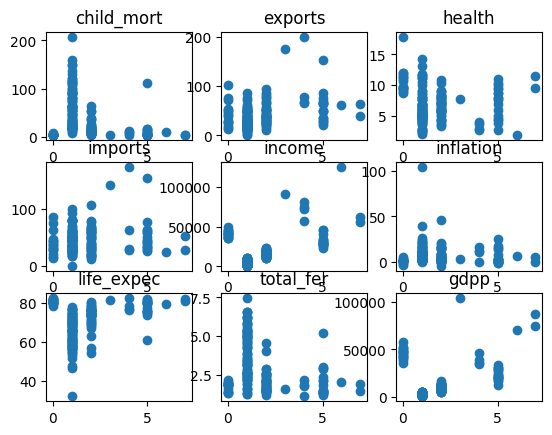

In [248]:
fig, axs = plt.subplots(3, 3)

axs[0][0].scatter( data_km[0], data_km['child_mort'])
axs[0][0].set_title('child_mort')

axs[0][1].scatter( data_km[0], data_km['exports'])
axs[0][1].set_title('exports')

axs[0][2].scatter( data_km[0], data_km['health'])
axs[0][2].set_title('health')

axs[1][0].scatter( data_km[0], data_km['imports'])
axs[1][0].set_title('imports')

axs[1][1].scatter( data_km[0], data_km['income'])
axs[1][1].set_title('income')

axs[1][2].scatter( data_km[0], data_km['inflation'])
axs[1][2].set_title('inflation')

axs[2][0].scatter( data_km[0], data_km['life_expec'])
axs[2][0].set_title('life_expec')

axs[2][1].scatter( data_km[0], data_km['total_fer'])
axs[2][1].set_title('total_fer')

axs[2][2].scatter( data_km[0], data_km['gdpp'])
axs[2][2].set_title('gdpp')

plt.show()

Graficamos por los grupos de spectral:

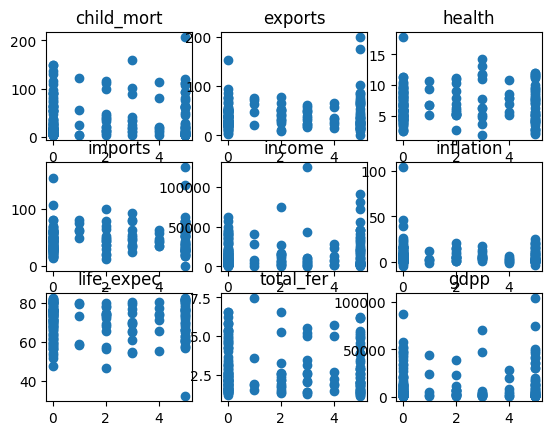

In [249]:
fig, axs = plt.subplots(3, 3)

axs[0][0].scatter( data_spec[0], data_spec['child_mort'])
axs[0][0].set_title('child_mort')

axs[0][1].scatter( data_spec[0], data_spec['exports'])
axs[0][1].set_title('exports')

axs[0][2].scatter( data_spec[0], data_spec['health'])
axs[0][2].set_title('health')

axs[1][0].scatter( data_spec[0], data_spec['imports'])
axs[1][0].set_title('imports')

axs[1][1].scatter( data_spec[0], data_spec['income'])
axs[1][1].set_title('income')

axs[1][2].scatter( data_spec[0], data_spec['inflation'])
axs[1][2].set_title('inflation')

axs[2][0].scatter( data_spec[0], data_spec['life_expec'])
axs[2][0].set_title('life_expec')

axs[2][1].scatter( data_spec[0], data_spec['total_fer'])
axs[2][1].set_title('total_fer')

axs[2][2].scatter( data_spec[0], data_spec['gdpp'])
axs[2][2].set_title('gdpp')

plt.show()

Graficamos por los grupos de SOM:

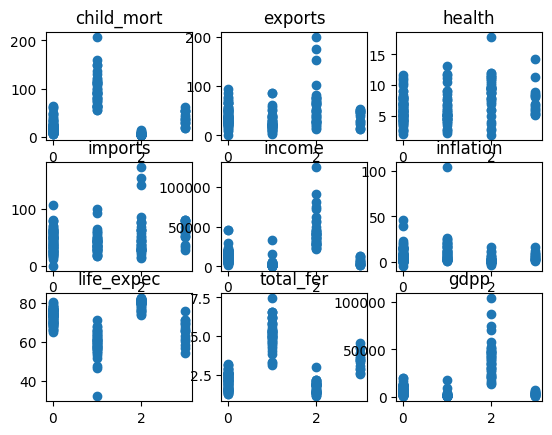

In [250]:
fig, axs = plt.subplots(3, 3)

axs[0][0].scatter( data_som[0], data_som['child_mort'])
axs[0][0].set_title('child_mort')

axs[0][1].scatter( data_som[0], data_som['exports'])
axs[0][1].set_title('exports')

axs[0][2].scatter( data_som[0], data_som['health'])
axs[0][2].set_title('health')

axs[1][0].scatter( data_som[0], data_som['imports'])
axs[1][0].set_title('imports')

axs[1][1].scatter( data_som[0], data_som['income'])
axs[1][1].set_title('income')

axs[1][2].scatter( data_som[0], data_som['inflation'])
axs[1][2].set_title('inflation')

axs[2][0].scatter( data_som[0], data_som['life_expec'])
axs[2][0].set_title('life_expec')

axs[2][1].scatter( data_som[0], data_som['total_fer'])
axs[2][1].set_title('total_fer')

axs[2][2].scatter( data_som[0], data_som['gdpp'])
axs[2][2].set_title('gdpp')

plt.show()

Los 3 agrupamientos generaron resultados que medianamente muestran un ligero patrón. Pero el que parece que establece más clara una diferencia entre sus valores es el agrupamiento del SOM.

Podemos ver que los paises del grupo 2 de SOM, son los que tienen mas ingresos, exportaciones, gdpp (PIB), expectativa de vida, importaciones; y así mismo son los que menos inflación, mortalidad infantil, y fertilidad; todos estos tienden a ser caracteristicas de paises del primer mundo.

Así que podríamos decir que este agrupamiento mide o relaciona los grupos con el desarrollo de los paises de cada grupo. Claro que no es algo polarizado, pero parece tener esa tendencia.